**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras import regularizers
from keras.applications import VGG16


In [3]:
# Load the CIFAR-10 dataset into training and testing sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [4]:
# Select only images of airplanes (class 0) and ships (class 8) from the dataset
airplane_ship_train_mask = np.where((train_labels == 0) | (train_labels == 8))[0]
airplane_ship_test_mask = np.where((test_labels == 0) | (test_labels == 8))[0]


In [5]:
# Filter the dataset to include only airplane and ship images and their corresponding labels
train_images = train_images[airplane_ship_train_mask]
train_labels = train_labels[airplane_ship_train_mask]
test_images = test_images[airplane_ship_test_mask]
test_labels = test_labels[airplane_ship_test_mask]

# Display the dimensions of the filtered datasets
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


Train images shape: (10000, 32, 32, 3)
Train labels shape: (10000, 1)
Test images shape: (2000, 32, 32, 3)
Test labels shape: (2000, 1)


In [6]:
# Convert labels to binary values: 0 for airplane and 1 for ship
train_labels = np.where(train_labels == 0, 0, 1)
test_labels = np.where(test_labels == 0, 0, 1)

# Display the dimensions of the filtered and relabeled datasets
print(f"Filtered training data shape: {train_images.shape}")
print(f"Filtered training labels shape: {train_labels.shape}")
print(f"Filtered testing data shape: {test_images.shape}")
print(f"Filtered testing labels shape: {test_labels.shape}")


Filtered training data shape: (10000, 32, 32, 3)
Filtered training labels shape: (10000, 1)
Filtered testing data shape: (2000, 32, 32, 3)
Filtered testing labels shape: (2000, 1)


In [7]:
# Define class names for binary classification: airplane and ship
class_names = ['airplane', 'ship']


In [8]:
# Normalize image pixel values to the range [0, 1] for improved model performance
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoded format for binary classification
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [9]:
def create_model(input_shape, num_classes):
    model = Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (32, 32, 3)
num_classes = 10

model = create_model(input_shape, num_classes)
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [10]:
# Define the optimizer, loss function, and evaluation metrics
compile_options = {
    'optimizer': 'adam',
    'loss': keras.losses.categorical_crossentropy,
    'metrics': ['accuracy']
}

# Compile the model with the specified options
model.compile(**compile_options)


In [11]:
def train_model(model, train_images, train_labels, batch_size=32, epochs=30, validation_split=0.2):
    return model.fit(
        train_images, train_labels,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=validation_split
    )

# Train the model and store the training history
training_history = train_model(model, train_images, train_labels)


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.4329 - loss: 2.2551 - val_accuracy: 0.7085 - val_loss: 0.6579
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7645 - loss: 0.7191 - val_accuracy: 0.7975 - val_loss: 0.4743
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8202 - loss: 0.4647 - val_accuracy: 0.8210 - val_loss: 0.3895
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8398 - loss: 0.3780 - val_accuracy: 0.8865 - val_loss: 0.2709
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8713 - loss: 0.3081 - val_accuracy: 0.8760 - val_loss: 0.2876
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8811 - loss: 0.2917 - val_accuracy: 0.9010 - val_loss: 0.2354
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8890 - loss: 0.2693 - val_accuracy: 0.9005 - val_loss: 0.2369
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9009 - loss: 0.2455 - val_accuracy:

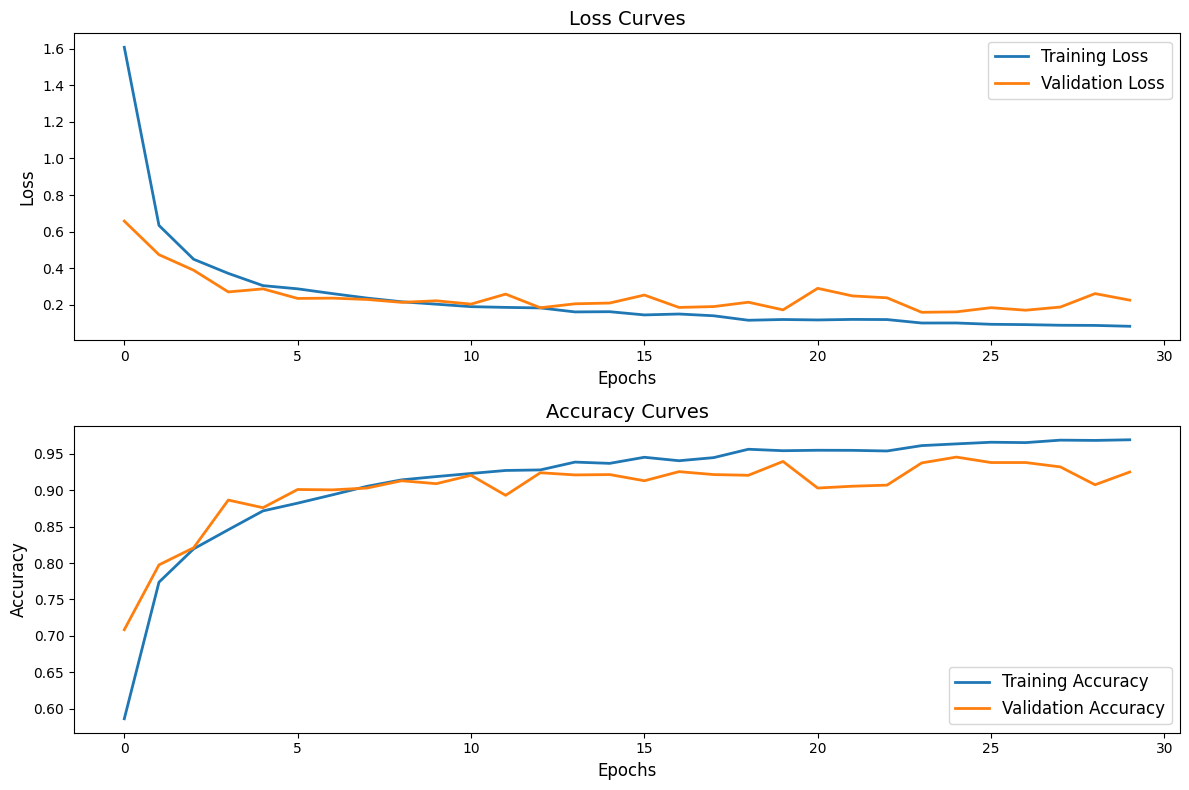

    Epoch  Training Accuracy  Validation Accuracy
0       1           0.586250               0.7085
1       2           0.773750               0.7975
2       3           0.819500               0.8210
3       4           0.845750               0.8865
4       5           0.871625               0.8760
5       6           0.882250               0.9010
6       7           0.893625               0.9005
7       8           0.905375               0.9030
8       9           0.914250               0.9130
9      10           0.918750               0.9090
10     11           0.923000               0.9205
11     12           0.927125               0.8930
12     13           0.927875               0.9240
13     14           0.938625               0.9210
14     15           0.936875               0.9215
15     16           0.945250               0.9130
16     17           0.940500               0.9255
17     18           0.944750               0.9215
18     19           0.956250               0.9205


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `training_history` contains the training history from the model
history = training_history.history

# Plot the loss and accuracy curves
plt.figure(figsize=[12, 8])

# Loss curve
plt.subplot(2, 1, 1)
plt.plot(history['loss'], label='Training Loss', linewidth=2.0)
plt.plot(history['val_loss'], label='Validation Loss', linewidth=2.0)
plt.legend(fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss Curves', fontsize=14)

# Accuracy curve
plt.subplot(2, 1, 2)
plt.plot(history['accuracy'], label='Training Accuracy', linewidth=2.0)
plt.plot(history['val_accuracy'], label='Validation Accuracy', linewidth=2.0)
plt.legend(fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Curves', fontsize=14)

plt.tight_layout()
plt.show()

# Create an accuracy table
accuracy_table = pd.DataFrame({
    'Epoch': list(range(1, len(history['accuracy']) + 1)),
    'Training Accuracy': history['accuracy'],
    'Validation Accuracy': history['val_accuracy']
})

print(accuracy_table)
accuracy_table.to_csv('accuracy_table.csv', index=False)
print("Accuracy table saved as 'accuracy_table.csv'")




In [15]:
# Generate predictions for the test images
predictions = model.predict(test_images)

# Display the raw prediction probabilities
print("Raw Predictions:\n", predictions)

# Convert the predictions into class labels
predicted_classes = np.argmax(predictions, axis=1)

# Display the predicted class labels
print("Predicted Classes:\n", predicted_classes)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Raw Predictions:
 [[2.4847214e-03 9.9751461e-01 8.3962966e-08 ... 1.3737953e-07
  8.1036461e-08 1.8086622e-07]
 [5.6450483e-03 9.9435329e-01 1.5686432e-07 ... 2.5871336e-07
  1.8019193e-07 5.2707912e-07]
 [7.7373594e-01 2.2626102e-01 3.7371015e-07 ... 5.5938506e-07
  1.9503624e-07 3.4939751e-07]
 ...
 [7.7452420e-08 9.9999988e-01 7.9126171e-11 ... 3.5478734e-10
  5.3150895e-10 1.0772181e-09]
 [9.9102002e-01 8.9571252e-03 2.6870462e-06 ... 4.7327903e-06
  2.5720178e-06 1.9557067e-06]
 [3.7729803e-02 9.6226645e-01 3.6844705e-07 ... 6.7718679e-07
  7.0596889e-07 4.9912961e-07]]
Predicted Classes:
 [1 1 0 ... 1 0 1]


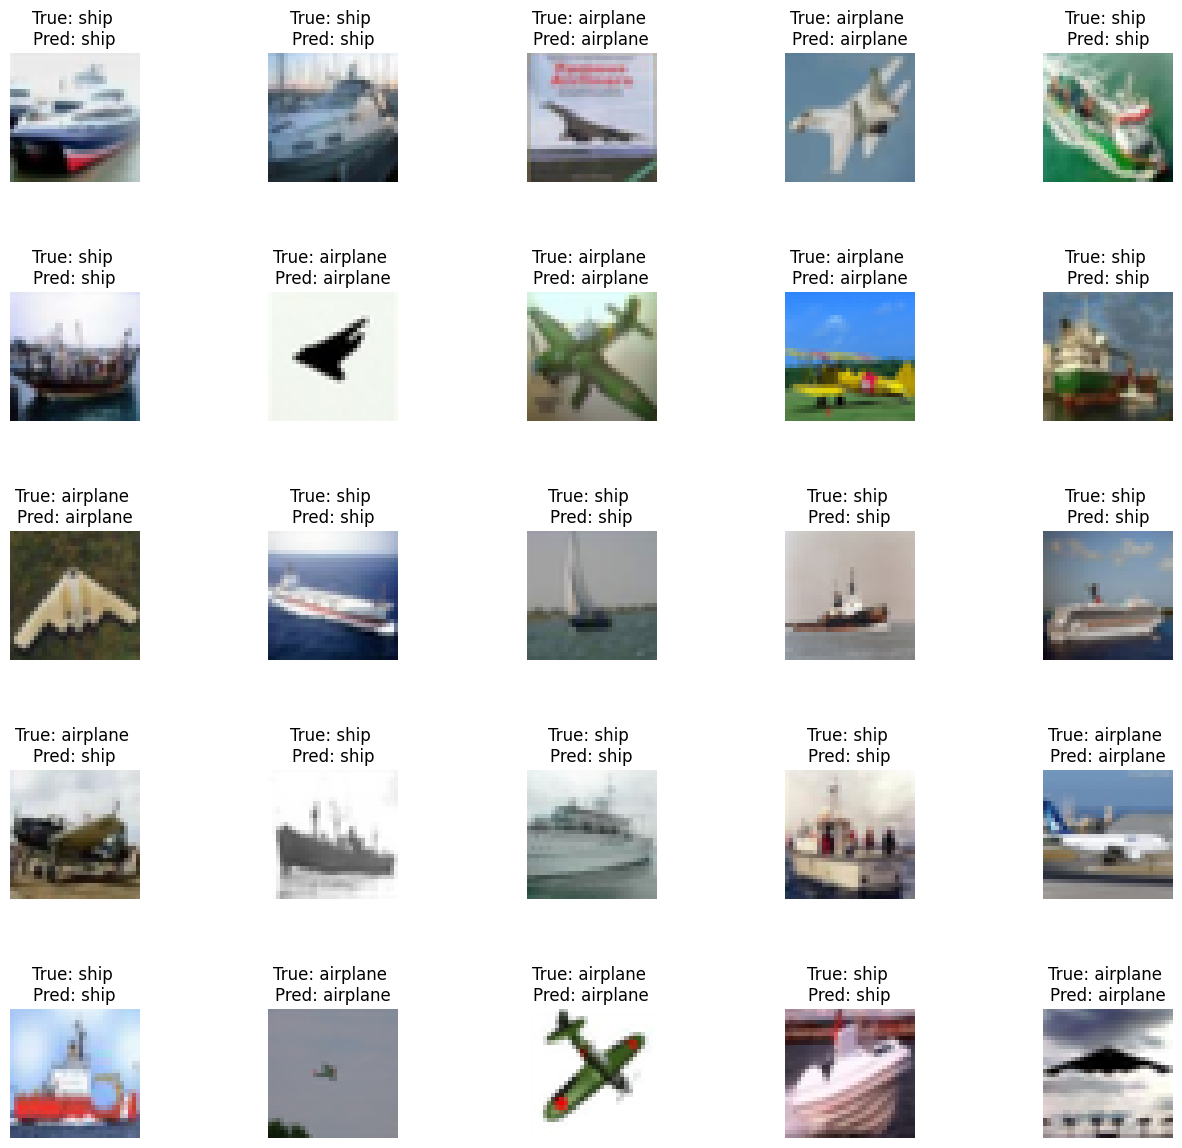

In [16]:
# Plotting Actual vs. Predicted results for the first 25 test images
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()  # Flatten the grid of axes for easier iteration

# Loop through the first 25 test images
for i in range(25):
    axes[i].imshow(test_images[i])  # Display the image
    axes[i].set_title(f"True: {class_names[np.argmax(test_labels[i])]} \nPred: {class_names[predicted_classes[i]]}")  # Show labels
    axes[i].axis('off')  # Remove axis for a cleaner look

plt.subplots_adjust(wspace=1.0)  # Adjust space between plots
plt.show()


# Pre-Trained Model

In [17]:
from keras.applications import VGG16
from keras import Model
from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization

# Load the VGG16 model without the top layers, pre-trained on ImageNet, tailored for CIFAR-10 input size
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze all layers in the base model to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained VGG16 base model
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=output_layer)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [18]:
# Compile the model with the Adam optimizer, categorical cross-entropy loss, and accuracy metric
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,984,522 (57.16 MB)

 Trainable params: 268,810 (1.03 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [19]:
# Train the model using the training data with specified batch size and epochs
history = model.fit(
    train_images, train_labels,
    batch_size=64,
    epochs=30,
    validation_data=(test_images, test_labels)
)


Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.6127 - loss: 1.4834 - val_accuracy: 0.8455 - val_loss: 0.4323
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8332 - loss: 0.4262 - val_accuracy: 0.8465 - val_loss: 0.3549
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8539 - loss: 0.3441 - val_accuracy: 0.8480 - val_loss: 0.3446
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8605 - loss: 0.3276 - val_accuracy: 0.8455 - val_loss: 0.3625
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8638 - loss: 0.3217 - val_accuracy: 0.8530 - val_loss: 0.3297
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8682 - loss: 0.3116 - val_accuracy: 0.8605 - val_loss: 0.3167
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8683 - loss: 0.2992 - val_accuracy: 0.8545 - val_loss: 0.3178
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8785 - loss: 0.2914 - val_acc

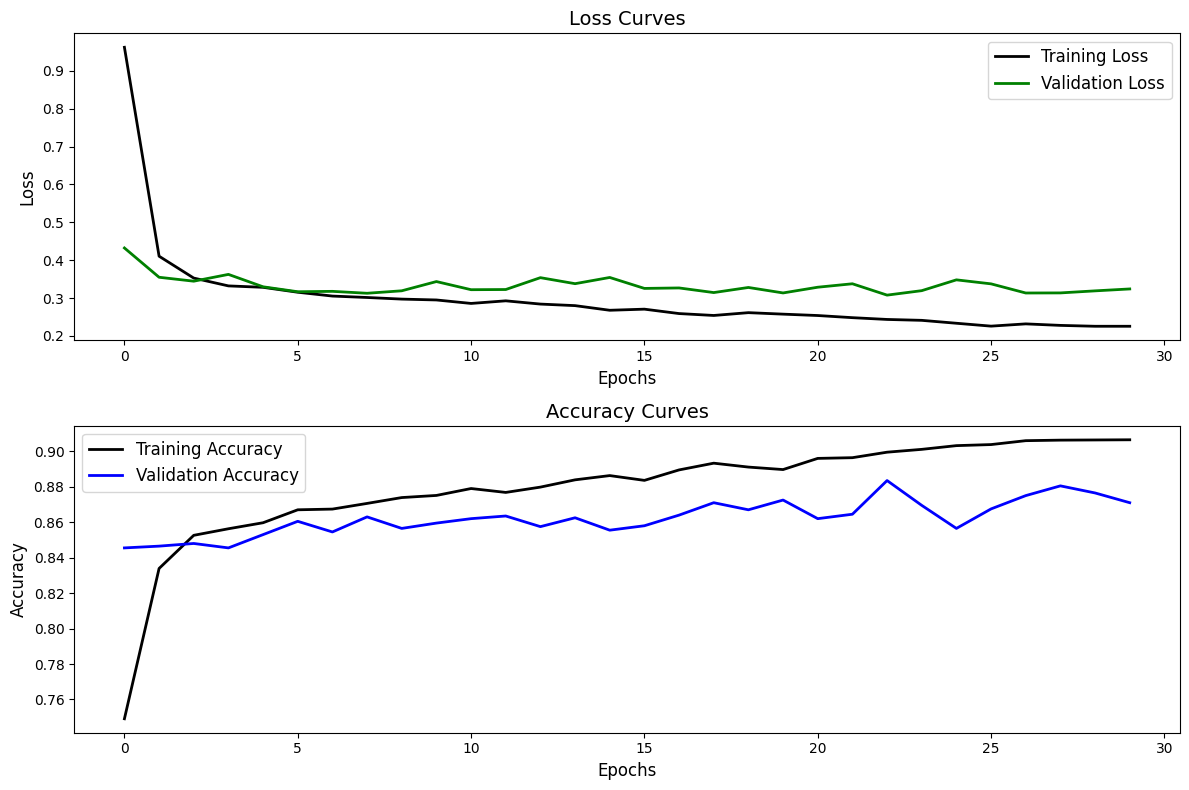

In [20]:
# Plot the loss and accuracy curves
plt.figure(figsize=[12, 8])

# Loss curve
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2.0, color='black')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.0, color='green')
plt.legend(fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss Curves', fontsize=14)

# Accuracy curve
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2.0, color='black')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.0, color='blue')
plt.legend(fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Curves', fontsize=14)

plt.tight_layout()
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Raw Predictions:
 [[3.92979151e-03 9.96066749e-01 5.72682836e-07 ... 2.17201560e-07
  3.39272617e-07 3.90346230e-07]
 [5.99083155e-02 9.40018833e-01 1.13353253e-05 ... 6.99135398e-06
  9.68560016e-06 6.65190328e-06]
 [2.91110486e-01 7.08853781e-01 5.44647537e-06 ... 4.91612263e-06
  3.61041066e-06 3.25174892e-06]
 ...
 [6.21406019e-01 3.78564268e-01 3.93472828e-06 ... 4.65101630e-06
  5.06772312e-06 1.78121627e-06]
 [9.96787310e-01 3.20753478e-03 6.46591047e-07 ... 7.27998270e-07
  4.98127690e-07 4.18876340e-07]
 [4.30735946e-03 9.95691001e-01 9.17884577e-08 ... 1.08740046e-07
  2.37603899e-07 4.93439359e-07]]
Predicted Classes:
 [1 1 1 ... 0 0 1]


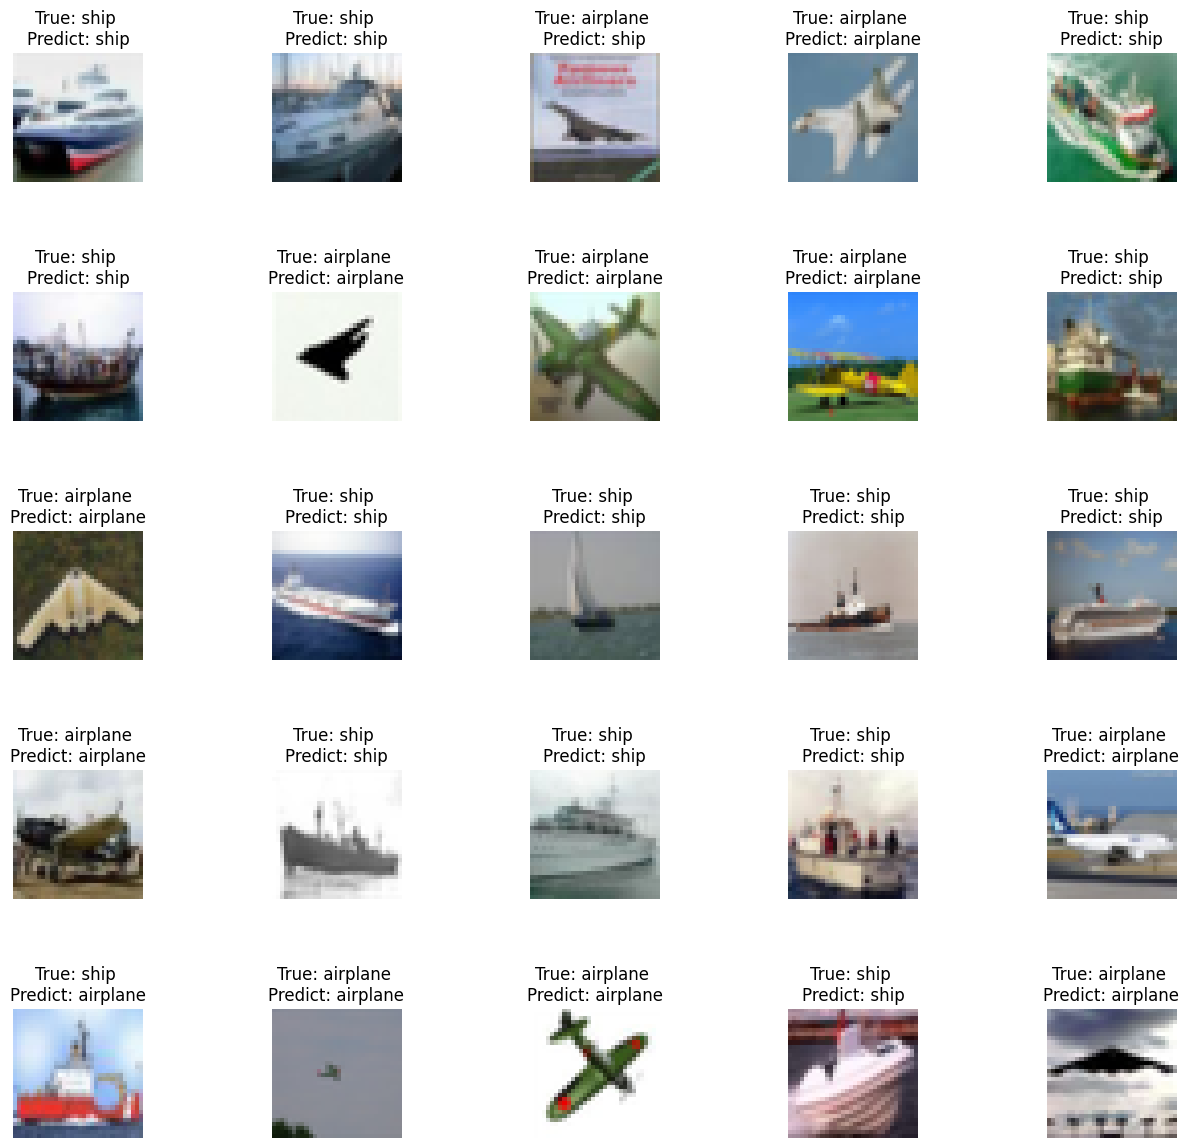

In [21]:
# Generate predictions for the test images
predictions = model.predict(test_images)
print("Raw Predictions:\n", predictions)

# Convert the predictions into class labels
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted Classes:\n", predicted_classes)

# Plotting Actual vs. Predicted results for the first 25 test images
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()  # Flatten the grid of subplots for easier iteration

# Loop through the first 25 test images
for i in range(25):
    axes[i].imshow(test_images[i])  # Display the image
    axes[i].set_title(f"True: {class_names[np.argmax(test_labels[i])]} \nPredict: {class_names[predicted_classes[i]]}")  # Show labels
    axes[i].axis('off')  # Remove axes for a cleaner look

# Adjust spacing between subplots for better layout
plt.subplots_adjust(wspace=1.0)
plt.show()
